In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel("C:/Users/ManiShankar/Documents/LetsUpgrade/AI_ML/Materials/Datasets/Linear Regression.xlsx")

In [3]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [4]:
data.tail(1)

,price,sqft_living,bedrooms,bathrooms,floors
21612,325000,1020,2,0.75,2.0


- We use pairplot to check linearity of variables

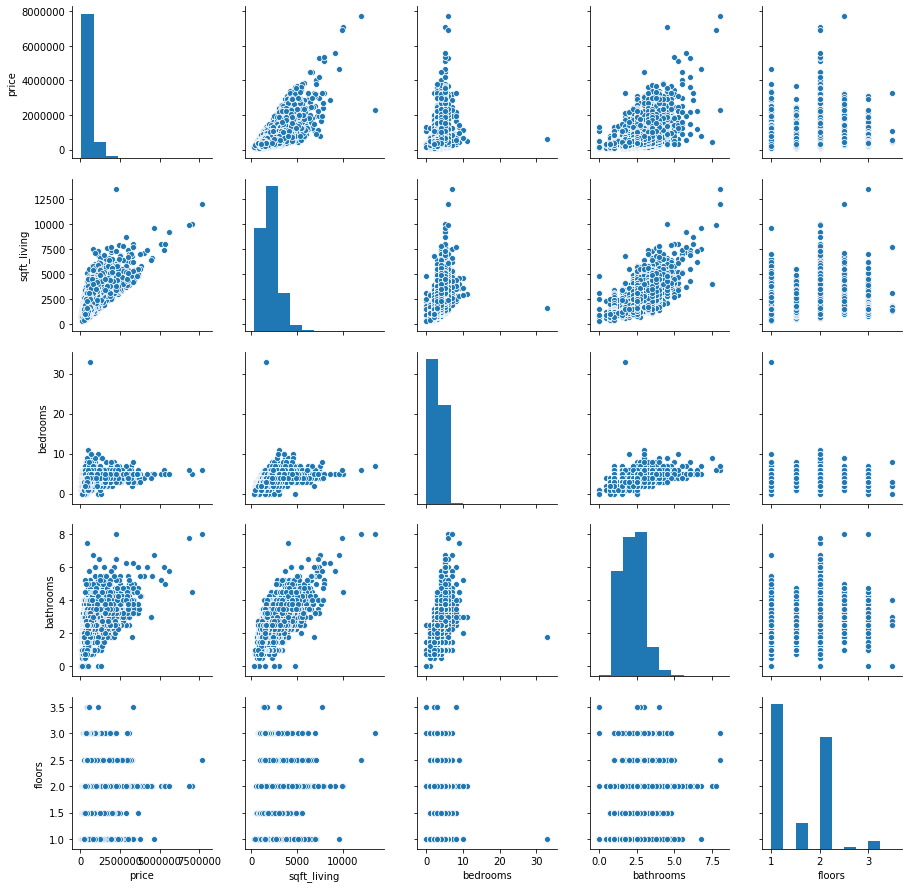

In [5]:
sns.pairplot(data)

In [6]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


- Fom above scatter diagram and correlation value we can conclude that regression can be used for all possible pairs

# price vs (sqft_living, bedrooms, bathrooms, floors)

In [7]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [8]:
# Checking for any null values
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [9]:
len(data)

21613

In [10]:
# checking for duplictaed rows and dropping them
data = data.drop_duplicates()
len(data)

21347

- There are no duplicated rows

In [11]:
x = data[['sqft_living','bedrooms','bathrooms','floors']]
y = data.price

In [12]:
print(len(x))
print(len(y))

21347
21347


> Heteroskedacity Test : All variables are heterogenously distributed

In [13]:
print("Skewness for sqft_living:",data.sqft_living.skew())
print("Skewness for bedrooms:",data.bedrooms.skew())
print("Skewness for bathrooms:",data.bathrooms.skew())
print("Skewness for floors:",data.floors.skew())

Skewness for sqft_living: 1.4709657395811246
Skewness for bedrooms: 1.9767470570707215
Skewness for bathrooms: 0.5127036515217419
Skewness for floors: 0.6120541118294506


- From skewness we conclude that all are positively skewed

In [14]:
print("Kurtosis for sqft_living:",data.sqft_living.kurt())
print("Kurtosis for bedrooms:",data.bedrooms.kurt())
print("Kurtosis for bathrooms:",data.bathrooms.kurt())
print("Kurtosis for floors:",data.floors.kurt())

Kurtosis for sqft_living: 5.246106994597049
Kurtosis for bedrooms: 49.202517237960016
Kurtosis for bathrooms: 1.3018374903259171
Kurtosis for floors: -0.48794452763243035


- From kurtosis we conclude that each variable is differently distributed

> Multicollinerity Test

In [15]:
x.corr()

,sqft_living,bedrooms,bathrooms,floors
sqft_living,1.000000,0.574542,0.753606,0.352400
bedrooms,0.574542,1.000000,0.513841,0.173016
bathrooms,0.753606,0.513841,1.000000,0.497726
floors,0.352400,0.173016,0.497726,1.000000


- Except for sqft_living and bathrooms all other variable combinations are least correlated

- Auto Correlation can't be appied as data is not of timeseries

In [16]:
x1 = sm.add_constant(x)

C:\Users\ManiShankar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
lm = sm.OLS(y,x1)

In [18]:
model = lm.fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     5470.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:40:06   Log-Likelihood:            -2.9637e+05
No. Observations:               21347   AIC:                         5.928e+05
Df Residuals:                   21342   BIC:                         5.928e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.258e+04   7768.200      9.344      0.000    5.74e+04    8.78e+04
sqft_living   309.2768      3.109     99.478      0.000     303.183     315.371
bedrooms    -5.754e+04   2363.348    -24.349      0.000   -6.22e+04   -5.29e+04
bathrooms    8474.1583   3846.372      2.203      0.028     934.980     1.6e+04
floors        275.7840   3812.597      0.072      0.942   -7197.192    7748.760
==============================================================================
Omnibus:                    14213.062   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           479366.852
Skew:                           2.727   Prob(JB):                         0.00
Kurtosis:                      25.566   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
7.467e+04

74670.0

1. Here r2 value is 0.507 means 50.7 % independent variables(sqft_living,bedrooms,bathrooms,floors) is affecting dependent varaible(price).
2. since p < 0.05 for all independent variables, there is a significant impact on price beacuse of independent variabes.
3. 74670.0 is the amount that need to be paid irrespective of house with number of bedrooms you buy.
4. 309.3932 the value that need to be paid for each sqft_living
5. 7853.5235 the value that need to be paid for each bathroom
6. 200.4943 the value that need to be paid for each floor